## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.503929  0.817352 -1.243983 -1.408314  0.550311 -1.400881
1  0.703059 -0.246943  0.777993 -0.274267 -0.483551  0.188787
2  0.443441  1.122740  0.561915 -0.213643  0.137031  0.639881
3 -1.404214  1.617245 -0.337335  1.268055  1.589413  0.176775
4  1.632203  1.103909 -1.653963  0.024385 -0.188263  0.813813


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0173117	total: 57.9ms	remaining: 57.9s
1:	learn: 1.0066286	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9959341	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9857736	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9766776	total: 60.4ms	remaining: 12s
5:	learn: 0.9673241	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9557585	total: 61.4ms	remaining: 8.71s
7:	learn: 0.9465976	total: 61.9ms	remaining: 7.68s
8:	learn: 0.9375303	total: 62.6ms	remaining: 6.89s
9:	learn: 0.9289907	total: 63.1ms	remaining: 6.25s
10:	learn: 0.9176290	total: 63.8ms	remaining: 5.74s
11:	learn: 0.9075428	total: 64.3ms	remaining: 5.3s
12:	learn: 0.8985782	total: 64.9ms	remaining: 4.93s
13:	learn: 0.8901895	total: 66ms	remaining: 4.65s
14:	learn: 0.8824498	total: 66.4ms	remaining: 4.36s
15:	learn: 0.8733196	total: 67ms	remaining: 4.12s
16:	learn: 0.8658119	total: 67.5ms	remaining: 3.9s
17:	learn: 0.8578266	total: 68ms	remaining: 3.71s
18:	learn: 0.8478703	total: 68.5ms	remaining: 3.54s
19

101:	learn: 0.4104622	total: 107ms	remaining: 939ms
102:	learn: 0.4069641	total: 107ms	remaining: 934ms
103:	learn: 0.4042958	total: 108ms	remaining: 928ms
104:	learn: 0.4011556	total: 108ms	remaining: 922ms
105:	learn: 0.3982117	total: 109ms	remaining: 917ms
106:	learn: 0.3945306	total: 109ms	remaining: 913ms
107:	learn: 0.3917301	total: 110ms	remaining: 908ms
108:	learn: 0.3884984	total: 110ms	remaining: 901ms
109:	learn: 0.3853927	total: 111ms	remaining: 896ms
110:	learn: 0.3825182	total: 111ms	remaining: 891ms
111:	learn: 0.3800087	total: 112ms	remaining: 886ms
112:	learn: 0.3770955	total: 112ms	remaining: 881ms
113:	learn: 0.3743409	total: 113ms	remaining: 876ms
114:	learn: 0.3710951	total: 113ms	remaining: 872ms
115:	learn: 0.3681300	total: 114ms	remaining: 867ms
116:	learn: 0.3652149	total: 114ms	remaining: 863ms
117:	learn: 0.3626166	total: 115ms	remaining: 859ms
118:	learn: 0.3606554	total: 115ms	remaining: 854ms
119:	learn: 0.3583472	total: 116ms	remaining: 849ms
120:	learn: 

273:	learn: 0.1248846	total: 187ms	remaining: 495ms
274:	learn: 0.1239713	total: 187ms	remaining: 493ms
275:	learn: 0.1230319	total: 188ms	remaining: 492ms
276:	learn: 0.1227559	total: 188ms	remaining: 491ms
277:	learn: 0.1221255	total: 189ms	remaining: 490ms
278:	learn: 0.1214577	total: 189ms	remaining: 488ms
279:	learn: 0.1205855	total: 189ms	remaining: 487ms
280:	learn: 0.1201218	total: 190ms	remaining: 485ms
281:	learn: 0.1191597	total: 190ms	remaining: 484ms
282:	learn: 0.1183942	total: 191ms	remaining: 484ms
283:	learn: 0.1180753	total: 191ms	remaining: 482ms
284:	learn: 0.1178181	total: 192ms	remaining: 481ms
285:	learn: 0.1170214	total: 192ms	remaining: 479ms
286:	learn: 0.1164751	total: 193ms	remaining: 479ms
287:	learn: 0.1155942	total: 193ms	remaining: 478ms
288:	learn: 0.1153449	total: 194ms	remaining: 476ms
289:	learn: 0.1147462	total: 194ms	remaining: 475ms
290:	learn: 0.1145024	total: 195ms	remaining: 474ms
291:	learn: 0.1142614	total: 195ms	remaining: 473ms
292:	learn: 

486:	learn: 0.0500856	total: 290ms	remaining: 305ms
487:	learn: 0.0497854	total: 290ms	remaining: 305ms
488:	learn: 0.0494820	total: 291ms	remaining: 304ms
489:	learn: 0.0491284	total: 291ms	remaining: 303ms
490:	learn: 0.0488625	total: 292ms	remaining: 302ms
491:	learn: 0.0488127	total: 293ms	remaining: 302ms
492:	learn: 0.0485204	total: 294ms	remaining: 302ms
493:	learn: 0.0481794	total: 294ms	remaining: 301ms
494:	learn: 0.0481305	total: 294ms	remaining: 300ms
495:	learn: 0.0478758	total: 295ms	remaining: 300ms
496:	learn: 0.0475631	total: 295ms	remaining: 299ms
497:	learn: 0.0475152	total: 296ms	remaining: 298ms
498:	learn: 0.0473061	total: 296ms	remaining: 298ms
499:	learn: 0.0470009	total: 297ms	remaining: 297ms
500:	learn: 0.0467026	total: 297ms	remaining: 296ms
501:	learn: 0.0466516	total: 298ms	remaining: 295ms
502:	learn: 0.0463925	total: 298ms	remaining: 295ms
503:	learn: 0.0462756	total: 299ms	remaining: 294ms
504:	learn: 0.0462158	total: 299ms	remaining: 293ms
505:	learn: 

652:	learn: 0.0279942	total: 370ms	remaining: 197ms
653:	learn: 0.0278373	total: 371ms	remaining: 196ms
654:	learn: 0.0276945	total: 371ms	remaining: 195ms
655:	learn: 0.0275941	total: 371ms	remaining: 195ms
656:	learn: 0.0274555	total: 372ms	remaining: 194ms
657:	learn: 0.0273779	total: 372ms	remaining: 193ms
658:	learn: 0.0273496	total: 373ms	remaining: 193ms
659:	learn: 0.0273217	total: 373ms	remaining: 192ms
660:	learn: 0.0272455	total: 374ms	remaining: 192ms
661:	learn: 0.0272236	total: 374ms	remaining: 191ms
662:	learn: 0.0270892	total: 375ms	remaining: 190ms
663:	learn: 0.0268846	total: 375ms	remaining: 190ms
664:	learn: 0.0268632	total: 375ms	remaining: 189ms
665:	learn: 0.0267377	total: 376ms	remaining: 188ms
666:	learn: 0.0267165	total: 376ms	remaining: 188ms
667:	learn: 0.0266401	total: 377ms	remaining: 187ms
668:	learn: 0.0266192	total: 377ms	remaining: 187ms
669:	learn: 0.0264207	total: 378ms	remaining: 186ms
670:	learn: 0.0263944	total: 378ms	remaining: 185ms
671:	learn: 

869:	learn: 0.0131260	total: 473ms	remaining: 70.7ms
870:	learn: 0.0130780	total: 474ms	remaining: 70.1ms
871:	learn: 0.0130312	total: 474ms	remaining: 69.6ms
872:	learn: 0.0129755	total: 474ms	remaining: 69ms
873:	learn: 0.0129289	total: 475ms	remaining: 68.5ms
874:	learn: 0.0128835	total: 475ms	remaining: 67.9ms
875:	learn: 0.0128441	total: 476ms	remaining: 67.3ms
876:	learn: 0.0127889	total: 476ms	remaining: 66.8ms
877:	learn: 0.0127443	total: 477ms	remaining: 66.2ms
878:	learn: 0.0127005	total: 477ms	remaining: 65.7ms
879:	learn: 0.0126584	total: 478ms	remaining: 65.1ms
880:	learn: 0.0126140	total: 478ms	remaining: 64.6ms
881:	learn: 0.0125732	total: 479ms	remaining: 64ms
882:	learn: 0.0125496	total: 479ms	remaining: 63.5ms
883:	learn: 0.0125065	total: 480ms	remaining: 62.9ms
884:	learn: 0.0124835	total: 480ms	remaining: 62.4ms
885:	learn: 0.0124414	total: 481ms	remaining: 61.9ms
886:	learn: 0.0124082	total: 481ms	remaining: 61.3ms
887:	learn: 0.0123776	total: 482ms	remaining: 60.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

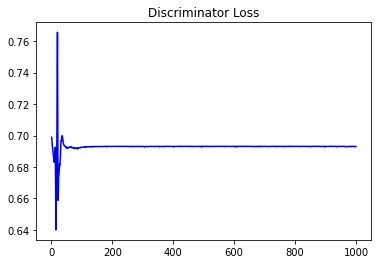

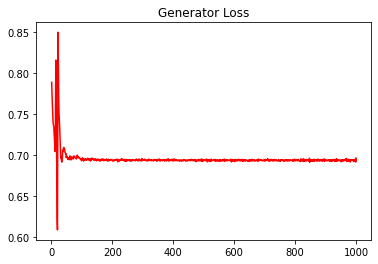

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.09403527831871614


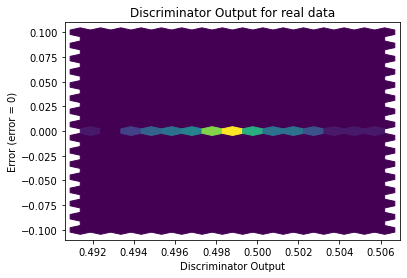

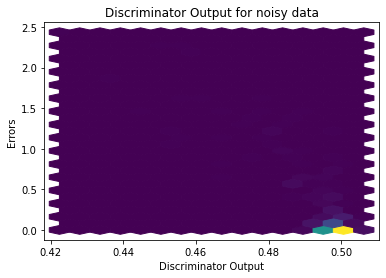

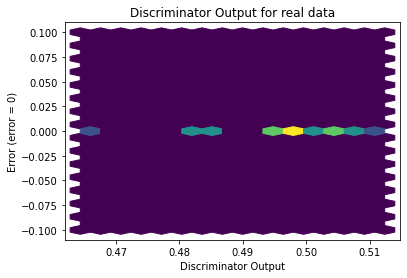

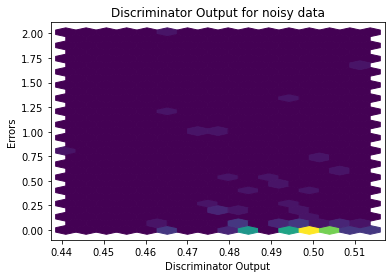

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


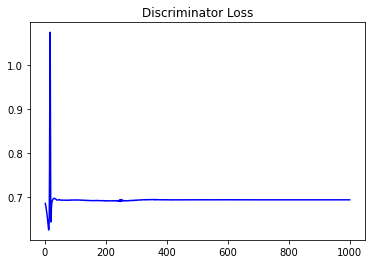

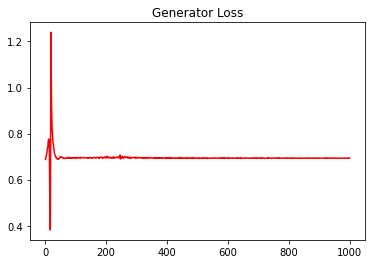

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.15052829881213012


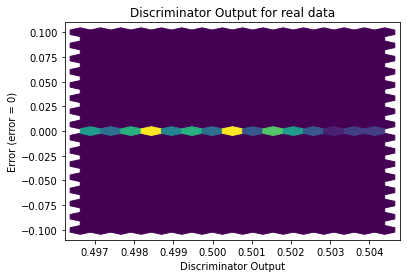

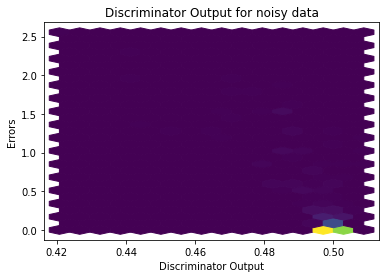

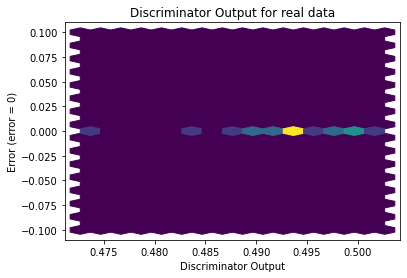

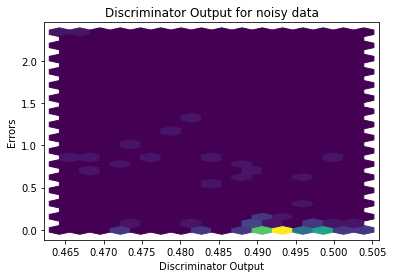

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0788]], requires_grad=True)
